# Definition & Working principle
Let's build model using **Linear regression**.

Linear regression is a **supervised learining** algorithm used when target / dependent variable  **continues** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line.   It work on the principle of ordinary least square $(OLS)$ / Mean square errror $(MSE)$. In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction. 


In [1]:
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualization
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet  # Linear models
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # Preprocessing tools
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics
# Load the dataset
df = pd.read_csv('insurance.csv')

# Basic information about the dataset
print('\nDataset Dimensions:', df.shape)
print('\nDataset Preview:')
print(df.head())


# Dataset summary statistics
print('\nSummary Statistics:')
print(df.describe())



Dataset Dimensions: (1338, 7)

Dataset Preview:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Data Visualization: Charges vs BMI

Objective: To visualize the relationship between bmi (independent variable) and charges (dependent variable).

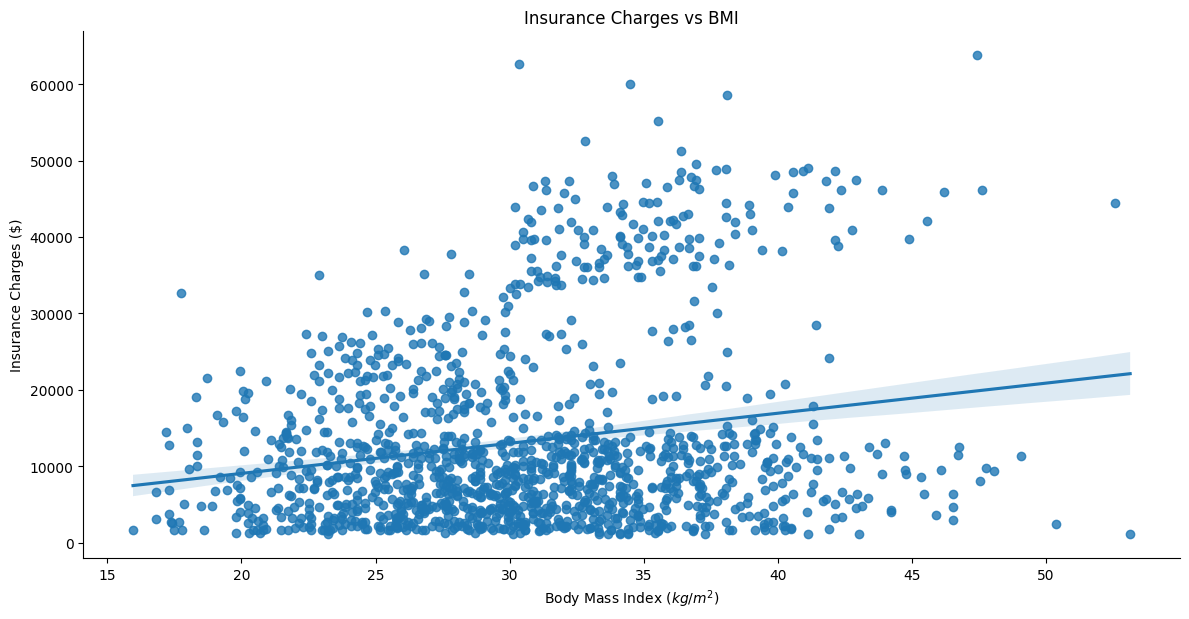

In [2]:
sns.lmplot(x='bmi', y='charges', data=df, aspect=2, height=6)
plt.xlabel('Body Mass Index $(kg/m^2)$')
plt.ylabel('Insurance Charges ($)')
plt.title('Insurance Charges vs BMI')
plt.show()


### Descriptive Statistics and Missing Values

Objective: Check for missing values and understand basic statistics.

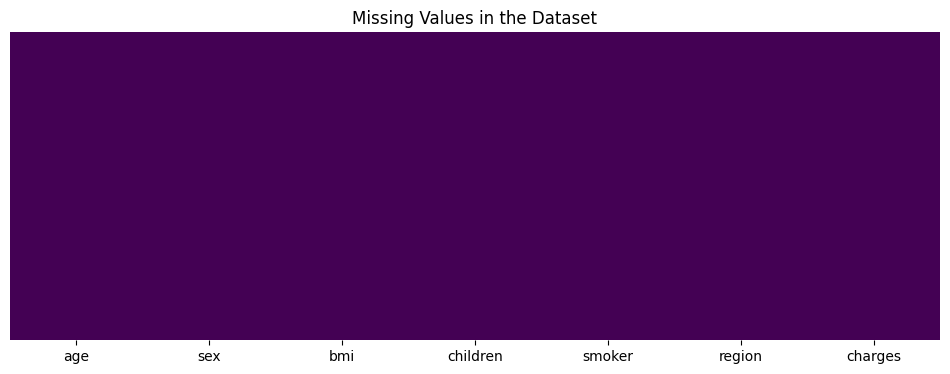

In [3]:
# Summary statistics
df.describe()

# Visualizing missing values
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in the Dataset')
plt.show()


### Data Preprocessing
#### One-Hot Encoding

Convert categorical features into numeric using One-Hot Encoding.



In [4]:
categorical_columns = ['sex', 'children', 'smoker', 'region']
df_encoded = pd.get_dummies(data=df, columns=categorical_columns, drop_first=True)

# Confirm the changes
df_encoded.head()


,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,False,False,False,False,False,False,True,False,False,True
1,18,33.770,1725.55230,True,True,False,False,False,False,False,False,True,False
2,28,33.000,4449.46200,True,False,False,True,False,False,False,False,True,False
3,33,22.705,21984.47061,True,False,False,False,False,False,False,True,False,False
4,32,28.880,3866.85520,True,False,False,False,False,False,False,True,False,False


#### Log Transformation

Apply a logarithmic transformation to normalize the skewness in the charges variable.



In [5]:
df_encoded['charges'] = np.log(df_encoded['charges'])
df_encoded['charges']

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1338, dtype: float64

### Train-Test Split

Objective: Split data into training and test sets.

In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)


### Linear Regression Using Normal Equation
#### Step 1: Add Intercept Term

In [7]:
X_train_0 = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0], 1)), X_test]


#### Step 2: Compute Parameters

In [8]:
# Ensure all features are numeric
X_train_0 = X_train_0.astype(float)
y_train = y_train.astype(float)

# Calculate theta using the Normal Equation
theta = np.linalg.inv(X_train_0.T @ X_train_0) @ (X_train_0.T @ y_train)

# Organize the parameters into a DataFrame
parameters = ['theta_' + str(i) for i in range(len(theta))]
columns = ['Intercept'] + list(X.columns)
parameter_df = pd.DataFrame({'Parameter': parameters, 'Feature': columns, 'Theta': theta})
parameter_df


,Parameter,Feature,Theta
0,theta_0,Intercept,7.059171
1,theta_1,age,0.033134
2,theta_2,bmi,0.013517
3,theta_3,sex_male,-0.067767
4,theta_4,children_1,0.149457
5,theta_5,children_2,0.272919
6,theta_6,children_3,0.244095
7,theta_7,children_4,0.523339
8,theta_8,children_5,0.466030
9,theta_9,smoker_yes,1.550481


### Linear Regression Using Scikit-Learn

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Extract parameters
sk_theta = [lin_reg.intercept_] + list(lin_reg.coef_)
parameter_df['Sklearn_Theta'] = sk_theta
parameter_df


,Parameter,Feature,Theta,Sklearn_Theta
0,theta_0,Intercept,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,sex_male,-0.067767,-0.067767
4,theta_4,children_1,0.149457,0.149457
5,theta_5,children_2,0.272919,0.272919
6,theta_6,children_3,0.244095,0.244095
7,theta_7,children_4,0.523339,0.523339
8,theta_8,children_5,0.466030,0.466030
9,theta_9,smoker_yes,1.550481,1.550481


### Model Evaluation
Predictions and Metrics

In [10]:
from sklearn.metrics import mean_squared_error

# Predictions using both methods
y_pred_norm = X_test_0 @ theta
y_pred_sk = lin_reg.predict(X_test)

# Calculate MSE and R-squared
mse_norm = mean_squared_error(y_test, y_pred_norm)
mse_sk = mean_squared_error(y_test, y_pred_sk)

r2_norm = 1 - (np.sum((y_test - y_pred_norm)**2) / np.sum((y_test - y_test.mean())**2))
r2_sk = lin_reg.score(X_test, y_test)

print(f"Normal Equation - MSE: {mse_norm:.2f}, R²: {r2_norm:.2f}")
print(f"Scikit-Learn - MSE: {mse_sk:.2f}, R²: {r2_sk:.2f}")


Normal Equation - MSE: 0.19, R²: 0.78
Scikit-Learn - MSE: 0.19, R²: 0.78


### Visualizing Predictions

Objective: Compare true vs predicted values for both approaches.



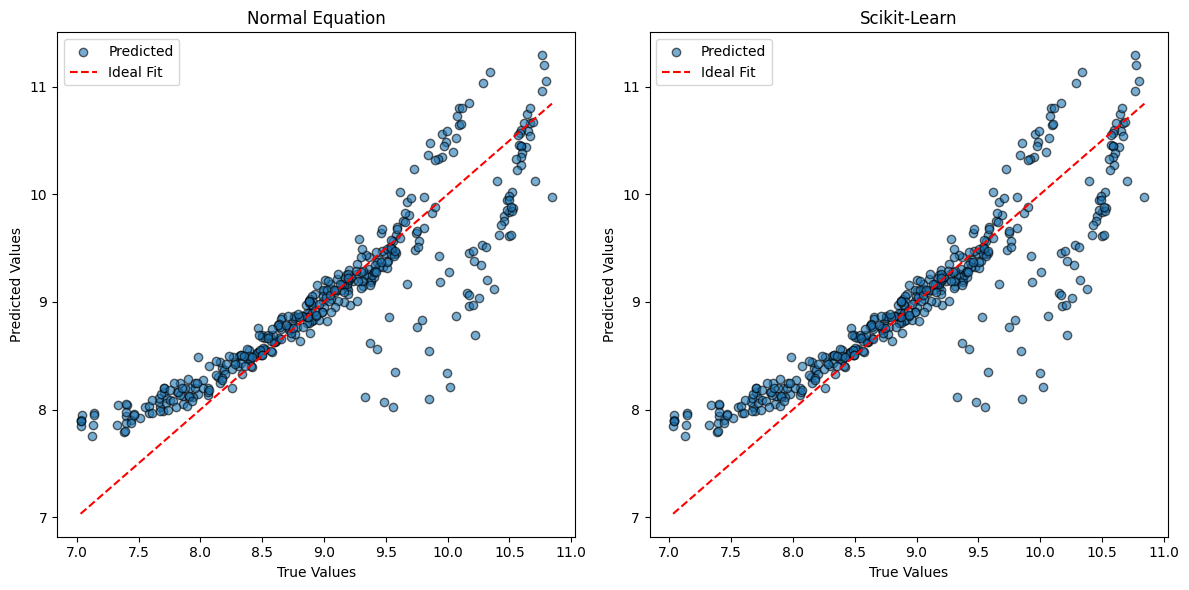

In [11]:
plt.figure(figsize=(12, 6))

# Normal Equation
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_norm, alpha=0.6, edgecolor='k', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Normal Equation')
plt.legend()

# Scikit-Learn
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sk, alpha=0.6, edgecolor='k', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scikit-Learn')
plt.legend()

plt.tight_layout()
plt.show()


### Ridge and Lasso Regression

Regularization techniques like Ridge Regression (L2 penalty) and Lasso Regression (L1 penalty) add constraints to the model, helping to reduce overfitting and improve generalization.

#### Ridge Regression


Ridge regression addresses potential overfitting by adding a penalty (L2 regularization) to the loss function. This ensures that the model coefficients are shrunk, reducing the impact of multicollinearity and preventing overly complex models.
Steps:

    Initialization: The Ridge regression model is initialized.
    Hyperparameter Tuning: GridSearchCV is used to find the optimal value of the hyperparameter alpha, which controls the strength of regularization. A range of alpha values [0.1, 1, 10, 100] is tested with 5-fold cross-validation.
    Best Estimator: After tuning, the best model (ridge_best) with the optimal alpha is selected.
    Evaluation:
        Predictions are made on the test data (y_pred_ridge).
        Mean Squared Error (MSE) and R² score are calculated to evaluate the model's performance.

Key Outputs:

    Best alpha value (best_alpha_ridge).
    Model performance metrics: MSE and R².

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize Ridge Regression
ridge = Ridge()

# Hyperparameter tuning for alpha using GridSearchCV
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

# Best alpha value
best_alpha_ridge = ridge_grid.best_params_['alpha']
ridge_best = ridge_grid.best_estimator_

# Predictions and evaluation
y_pred_ridge = ridge_best.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = ridge_best.score(X_test, y_test)

print(f"Ridge Regression - Best Alpha: {best_alpha_ridge}")
print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}")


Ridge Regression - Best Alpha: 0.1
Ridge Regression - MSE: 0.19, R²: 0.78


#### Lasso Regression

Lasso regression uses L1 regularization, which not only prevents overfitting but also performs feature selection by shrinking some coefficients to zero. This can lead to simpler and more interpretable models.
Steps:

    Initialization: The Lasso regression model is initialized.
    Hyperparameter Tuning: GridSearchCV is employed to find the optimal alpha value. The values [0.001, 0.01, 0.1, 1] are tested using 5-fold cross-validation.
    Best Estimator: The best model (lasso_best) with the most suitable alpha value is selected.
    Evaluation:
        Predictions are made on the test data (y_pred_lasso).
        MSE and R² score are calculated to evaluate performance.

Key Outputs:

    Best alpha value (best_alpha_lasso).
    Model performance metrics: MSE and R².

In [13]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression
lasso = Lasso()

# Hyperparameter tuning for alpha using GridSearchCV
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

# Best alpha value
best_alpha_lasso = lasso_grid.best_params_['alpha']
lasso_best = lasso_grid.best_estimator_

# Predictions and evaluation
y_pred_lasso = lasso_best.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = lasso_best.score(X_test, y_test)

print(f"Lasso Regression - Best Alpha: {best_alpha_lasso}")
print(f"Lasso Regression - MSE: {mse_lasso:.2f}, R²: {r2_lasso:.2f}")


Lasso Regression - Best Alpha: 0.001
Lasso Regression - MSE: 0.19, R²: 0.78


In [14]:
# Create a comparison dataframe
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "MSE": [mse_sk, mse_ridge, mse_lasso],
    "R²": [r2_sk, r2_ridge, r2_lasso]
})

# Display the comparison
comparison.sort_values(by="R²", ascending=False, inplace=True)
comparison


,Model,MSE,R²
1,Ridge Regression,0.187294,0.779572
0,Linear Regression,0.187296,0.779569
2,Lasso Regression,0.187554,0.779265


#### Visualizing Coefficients

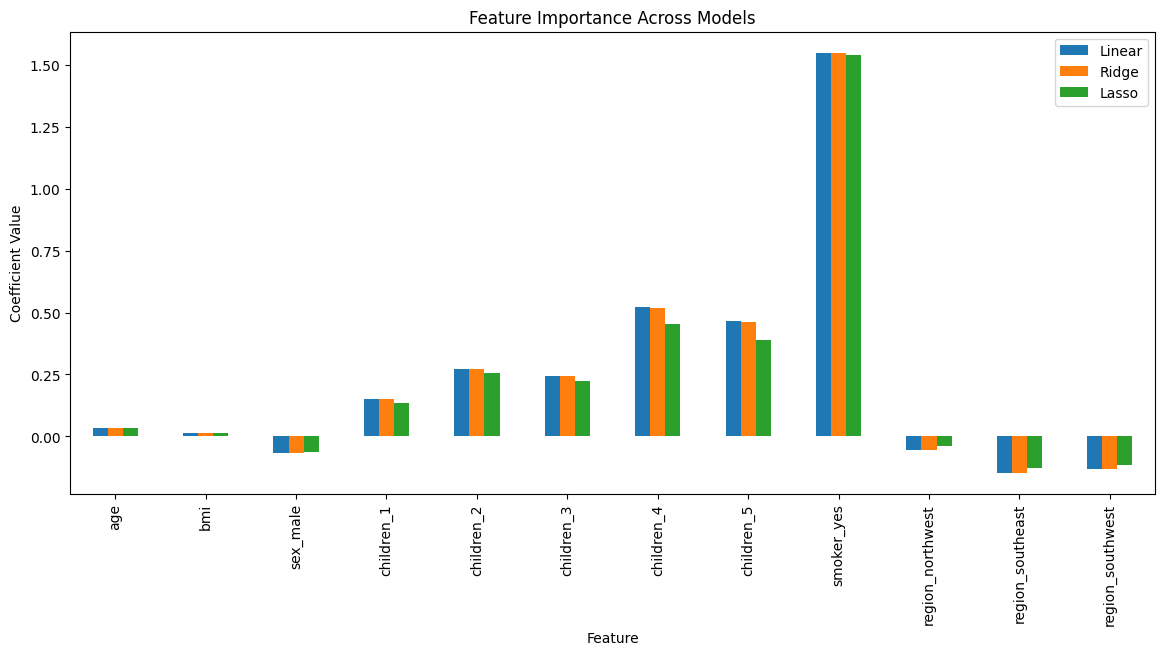

In [15]:
# Combine coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Linear": lin_reg.coef_,
    "Ridge": ridge_best.coef_,
    "Lasso": lasso_best.coef_
})

# Plot
coefficients.set_index("Feature").plot(kind="bar", figsize=(14, 6))
plt.title("Feature Importance Across Models")
plt.ylabel("Coefficient Value")
plt.show()


### Observations

    Ridge Regression:
        L2 regularization shrinks the coefficients of less important features but retains all features.
        Best suited for scenarios with multicollinearity.
    Lasso Regression:
        L1 regularization can zero out some coefficients, effectively performing feature selection.
        Useful for sparse models where some features are irrelevant.
    Performance Comparison:
        Ridge and Lasso may outperform Linear Regression depending on the dataset, particularly when multicollinearity exists or overfitting occurs.